### Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pzblend import PhotozBlend

### Load catalogs

In [2]:
# - necessary file paths
coadd_filename = 'data/coadd_data_tract_3830_cutout.parquet'
truth_filename = 'data/truth_data_hpix_9685_cutout.parquet'
zgrid_filename = 'data/zgrid.npy'

# - read in the truth and coadd catalogs (make sure you have pyarrow installed)
truth_df = pd.read_parquet(truth_filename, engine='pyarrow')
coadd_df = pd.read_parquet(coadd_filename, engine='pyarrow')

# - now read in photoz pdf bin centers
zgrid = np.load(zgrid_filename)

In [3]:
# view the coadd dataframe (DC2_run2.2i including photoz data -- all objects not purely galaxies)
coadd_df

,blendedness,extendedness,objectId,mag_err_g_lsst,mag_err_i_lsst,mag_err_r_lsst,mag_err_u_lsst,mag_err_y_lsst,mag_err_z_lsst,mag_g_lsst,mag_i_lsst,mag_r_lsst,mag_u_lsst,mag_y_lsst,mag_z_lsst,...,base_PixelFlags_flag_saturatedCenter,ext_shapeHSM_HsmShapeRegauss_resolution,ext_shapeHSM_HsmShapeRegauss_flag,base_PixelFlags_flag_crCenter,snr_i_cModel,mag_i,ext_shapeHSM_HsmShapeRegauss_sigma,ext_shapeHSM_HsmShapeRegauss_e2,base_PixelFlags_flag_clipped,base_PixelFlags_flag_interpolatedCenter,shape_hsm_regauss_etot,i_modelfit_CModel_instFlux,base_Blendedness_abs,base_PixelFlags_flag_edge,base_PixelFlags_flag_suspectCenter
0,0.000000,1.0,16844531022438126,0.065997,0.080499,0.062015,0.210728,0.177782,0.211722,24.092278,23.646614,23.974358,24.266185,22.843010,23.359926,...,False,0.709510,False,False,12.993749,24.375484,0.206019,-0.824928,False,False,0.843260,21.729301,0.000000,False,False
1,0.000000,1.0,16844531022438134,0.019929,0.013544,0.013899,0.067661,0.038138,0.035239,22.888331,21.637695,22.452577,22.915635,21.048416,21.490861,...,False,0.627463,False,False,79.664076,22.402154,0.033976,-0.487452,False,False,0.561758,138.237667,0.000000,False,False
2,0.000000,1.0,16844531022438140,0.761073,0.178314,0.266046,2.004078,0.324567,0.393073,27.703371,25.045024,26.330602,28.216337,24.093776,24.658601,...,False,0.203191,False,False,5.602596,25.098456,1.905089,-2.095791,False,False,2.126124,5.993693,0.000000,False,False
3,0.000000,1.0,16844531022438144,1.921290,0.207429,1.082234,1.431199,25.128060,0.722832,29.457093,25.382658,28.320728,27.537083,99.000000,25.479351,...,False,0.135328,False,False,4.750171,25.432277,3.251860,2.434354,False,False,2.517239,4.396119,0.000000,False,False
4,0.000000,1.0,16844531022438145,0.101278,0.253981,0.122337,0.184960,0.370367,0.545347,25.020978,25.410154,25.183084,24.526894,24.272973,24.907085,...,False,0.296641,False,False,3.794354,25.818637,0.534706,0.627242,False,False,2.073869,4.278135,0.000000,False,False
5,0.000000,1.0,16844531022438154,0.025675,0.032715,0.023746,0.057827,0.060826,0.094030,23.155963,22.934537,23.183529,23.150505,21.976840,22.634966,...,False,0.331785,False,False,32.690214,23.318531,0.150599,-1.372387,False,False,1.625978,41.868694,0.000000,False,False
6,0.000000,1.0,16844531022438157,0.155285,0.096357,0.113167,0.548000,0.369921,0.215813,25.463877,24.002915,25.105395,25.973094,24.044713,23.684963,...,False,0.436761,False,False,10.775273,24.470560,0.333230,-1.737468,False,False,1.749870,15.650865,0.000000,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209834,NaN,0.0,16845093663180080,0.214404,1.244770,0.979272,26.621517,1.243055,25.607758,26.381386,28.034569,28.199806,99.000000,26.028583,99.000000,...,False,NaN,True,False,0.465748,28.177600,NaN,NaN,False,False,NaN,0.381303,NaN,False,False
209835,0.062651,1.0,16845093663180081,0.175966,0.392558,0.268306,26.621517,0.712929,0.778439,25.847671,26.055938,26.045602,99.000000,25.043161,25.609105,...,False,0.164063,False,False,2.295859,26.274125,2.060014,-0.854902,False,False,0.992816,2.361238,0.062651,False,False


In [4]:
# view the truth dataframe (CosmoDC2.v.1.1.4 -- all galaxies)
truth_df

,convergence,mag_y_lsst,mag_g_lsst,shear_2,size_true,ellipticity_2_true,mag_r_lsst,mag_i_lsst,shear_1,ra,dec,galaxy_id,redshift,ellipticity_1_true,mag_z_lsst,mag_u_lsst
0,0.000000,20.744215,21.908850,0.000000,1.018821,-0.064685,21.300671,21.002077,-0.000000,60.662952,-35.830005,6937500015,0.018792,-0.038679,20.839300,23.220953
1,0.000000,19.051983,19.728199,0.000000,1.176416,-0.196390,19.384548,19.193548,-0.000000,61.052104,-35.963739,6937500019,0.020935,0.201951,19.111479,20.633488
2,0.000000,21.676519,22.133457,0.000000,0.732350,-0.369034,21.891478,21.743605,-0.000000,60.060886,-35.671489,6937500034,0.021775,0.244753,21.703161,22.997492
3,0.000000,18.059032,19.193232,0.000000,5.556091,0.235753,18.592686,18.284004,-0.000000,60.682958,-36.090835,6937500035,0.015381,-0.049271,18.140318,20.454403
4,0.000000,21.116013,21.912745,0.000000,1.959537,-0.020551,21.453812,21.235888,-0.000000,60.049973,-36.262682,6937500037,0.017014,-0.003696,21.160646,22.999830
5,0.000000,19.967188,20.605556,0.000000,2.926275,-0.422944,20.248081,20.059515,-0.000000,60.498402,-35.677751,6937500041,0.009186,-0.173866,19.998640,21.622858
6,0.000000,20.333221,21.109692,0.000000,3.890245,-0.000781,20.690023,20.461641,-0.000000,61.150696,-35.999600,6937500043,0.017729,0.002556,20.373169,22.202917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030223,-0.008962,28.147328,28.101551,0.024962,0.026517,-0.000471,27.925516,27.994963,0.004326,60.013515,-35.675120,6958349819,2.995971,-0.000545,28.064869,29.223814
1030224,0.000311,28.158454,28.048569,0.001493,0.056791,0.000616,27.911748,27.997735,0.017371,60.778958,-35.678101,6958350495,2.982929,0.006081,28.075333,29.083872


### Define cuts

In [5]:
# Let's define our quality cuts

# - quality cuts on the truth dataframe
truth_cuts = [
    'mag_i_lsst.notna()',  # remove nan magnitudes
    'mag_i_lsst < 27',     # apply a magnitude cut
]

# - quality cuts on the coadd dataframe 
basic_cuts = [
    'extendedness > 0',  # select the extended objects
    'mag_i.notna()',     # select objects that have i-band magnitudes
    #'clean',            # the source has no flagged pixels (interpolated, saturated, edge, clipped...) 
                         # and was not skipped by the deblender # (good && ~deblend_skipped) < already applied! >
    'xy_flag == 0'       # bad centroiding
]

lensing_cuts = [
    'i_modelfit_CModel_instFlux.notna()', # (from this and below) remove nan entries
    'ext_shapeHSM_HsmShapeRegauss_resolution.notna()',
    'ext_shapeHSM_HsmShapeRegauss_e1.notna()',
    'ext_shapeHSM_HsmShapeRegauss_e2.notna()',
    'snr_i_cModel >= 10',
    'detect_isPrimary',                   # (from this and below) basic flag cuts 
    'deblend_skipped == False',
    'base_PixelFlags_flag_edge == False',
    'base_PixelFlags_flag_interpolatedCenter == False',
    'base_PixelFlags_flag_saturatedCenter == False',
    'base_PixelFlags_flag_crCenter == False',
    'base_PixelFlags_flag_bad == False',
    'base_PixelFlags_flag_suspectCenter == False',
    'base_PixelFlags_flag_clipped == False',
    'ext_shapeHSM_HsmShapeRegauss_flag == False',
    'ext_shapeHSM_HsmShapeRegauss_resolution >= 0.3',
    'shape_hsm_regauss_etot < 2',
    'ext_shapeHSM_HsmShapeRegauss_sigma <= 0.4',
    'mag_i_cModel < 24',                  # FIXME: Doesn't have extinction correction?
    'base_Blendedness_abs < 10**(-0.375)'
]

### Feed data to the class

In [6]:
# - create an instance of the PhotozBlend class
pzb = PhotozBlend(truth_df, coadd_df, zgrid)

INFO:root:<module>:fof_match: The results of FoF catalog matching is cached in 'output/fof_results--linking_lengths=1.0.cache'
As long as this file is not deleted, you can load it again by setting load_cached=True.


<module>:fof_match: FoF results are verified, everything looks good.


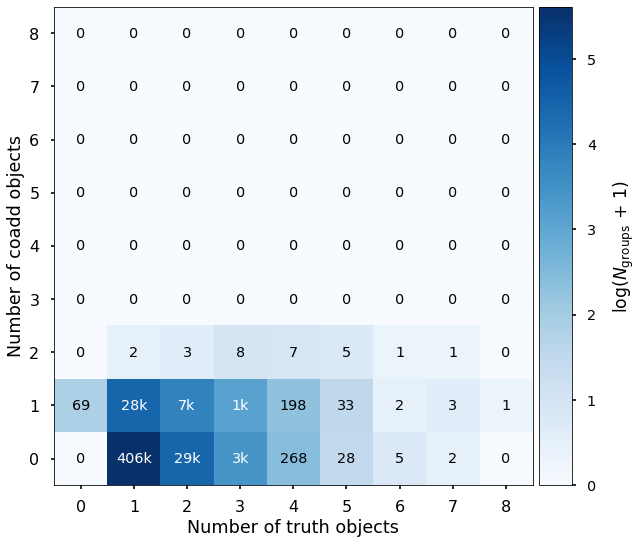

In [7]:
# - apply the cuts we defined earlier
pzb.apply_truth_cuts(truth_cuts)
pzb.apply_coadd_cuts(basic_cuts+lensing_cuts)

# - do the friends of friends matching
pzb.fof_match(verify=True, plot=True, save_cached=True) # load_cached=True

In [8]:
# - let's take a look at the results of fof-matching
pzb.fof_results

,row_index,catalog_key,group_id,mag_i_lsst
row_index,,,,
0,0,truth,0,21.002077
1,1,truth,1,19.193548
3494,3494,coadd,1,19.044742
2,2,truth,2,21.743605
3,3,truth,3,18.284004
321436,321436,truth,3,25.602109
4,4,truth,4,21.235888
...,...,...,...,...
31169,31169,coadd,475210,23.364136


### Plotting

INFO:root:plot_zz:load_redshifts: New redshift dataframes have been created.


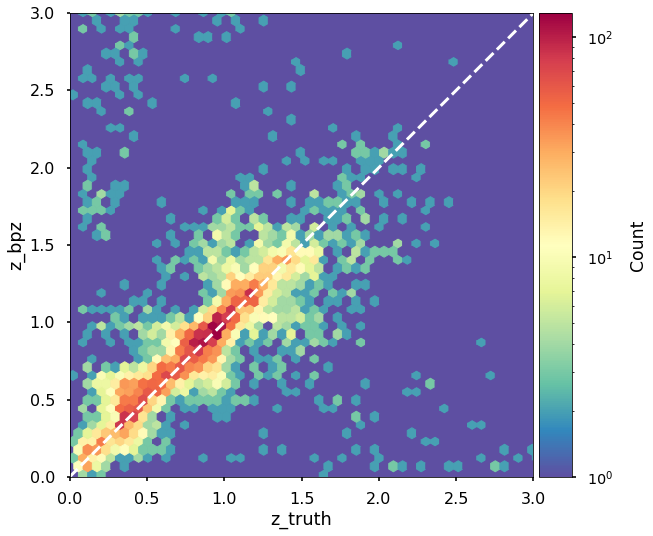

In [9]:
# in all the plotting functions you can use save_plot=True to save the plots
# force_refresh=True tries to forcefully recompute things for the new plot (not usually needed but just in case)
# use_latest=True uses the latest parameters and settings
# the default behaviour is to use the latest values unless you explicitly pass a keyword argument

# - zz plot
pzb.plot_zz(pz_type='z_mode', num_truth=2, num_coadd=1, truth_pick='bright', colorbar='vertical')
           
# - zz plot (with more plotting options)
# pzb.plot_zz(pz_type='z_mode', num_truth=2, num_coadd=1, truth_pick='bright',
#             xlim=(0,3), ylim=(0,3), fig=None, figsize=None, ax=None, colorbar='vertical',
#             pad='0.9%', cmap=plt.cm.Spectral_r, annotate=1, colorbar_lim=(None,None))

INFO:root:plot_pdf:load_redshifts: The redshift dataframes remained unchanged since no update was needed.
INFO:root:plot_pdf:stack_photoz: New stacked photoz's have been created.
INFO:root:plot_pdf:kde_dask: Estimated the bandwidth of the kernel using the scott method to be 0.070.


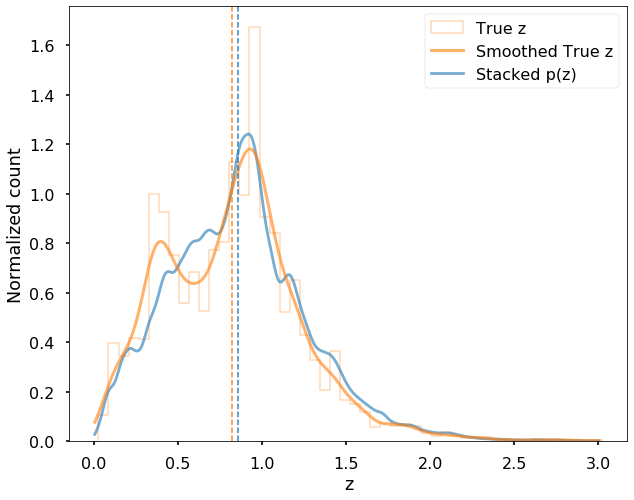

In [10]:
# - plot photo-z stacked pdf vs true-z histogram
#   note that it inherited some parameters from the previous plotting command
#   (you can always update them for each plot if you want)
pzb.plot_pdf(kde_bandwidth='scott')

# - with more options, e.g. using ML to choose a cross-validated bandwidth given a list of bandwidths to select from (takes longer!)
# pzb.plot_pdf(kde_bandwidth=np.logspace(0.01,0.2,20), n_iter=15, n_jobs=-1)

INFO:root:plot_pit:load_redshifts: The redshift dataframes remained unchanged since no update was needed.


INFO:root:plot_pit:calc_pits: New PIT values have been created.
INFO:root:<module>:plot_pit: The plot is saved in '/Users/erfan/Downloads/python_codes/output/plots/pit-2-1-bright.png'


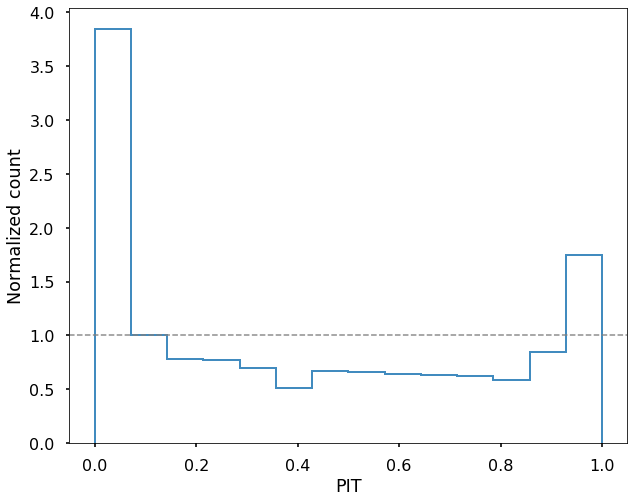

In [11]:
# - plot the PIT histogram
pzb.plot_pit(save_plot=1)

### Put them all together in multiplots

INFO:root:plot_zz:load_redshifts: The redshift dataframes remained unchanged since no update was needed.
INFO:root:plot_pdf:load_redshifts: The redshift dataframes remained unchanged since no update was needed.
INFO:root:plot_pdf:stack_photoz: The stacked photoz remained unchanged since no update was needed.
INFO:root:plot_pdf:kde_dask: The kde-estimated true-z density funcion remained unchanged since no update was needed.
INFO:root:plot_pit:load_redshifts: The redshift dataframes remained unchanged since no update was needed.
INFO:root:plot_pit:calc_pits: The PIT values remained unchanged since no update was needed.
INFO:root:<module>:plot_multi: The plot is saved in '/Users/erfan/Downloads/python_codes/output/plots/multi-2-1-bright.png'


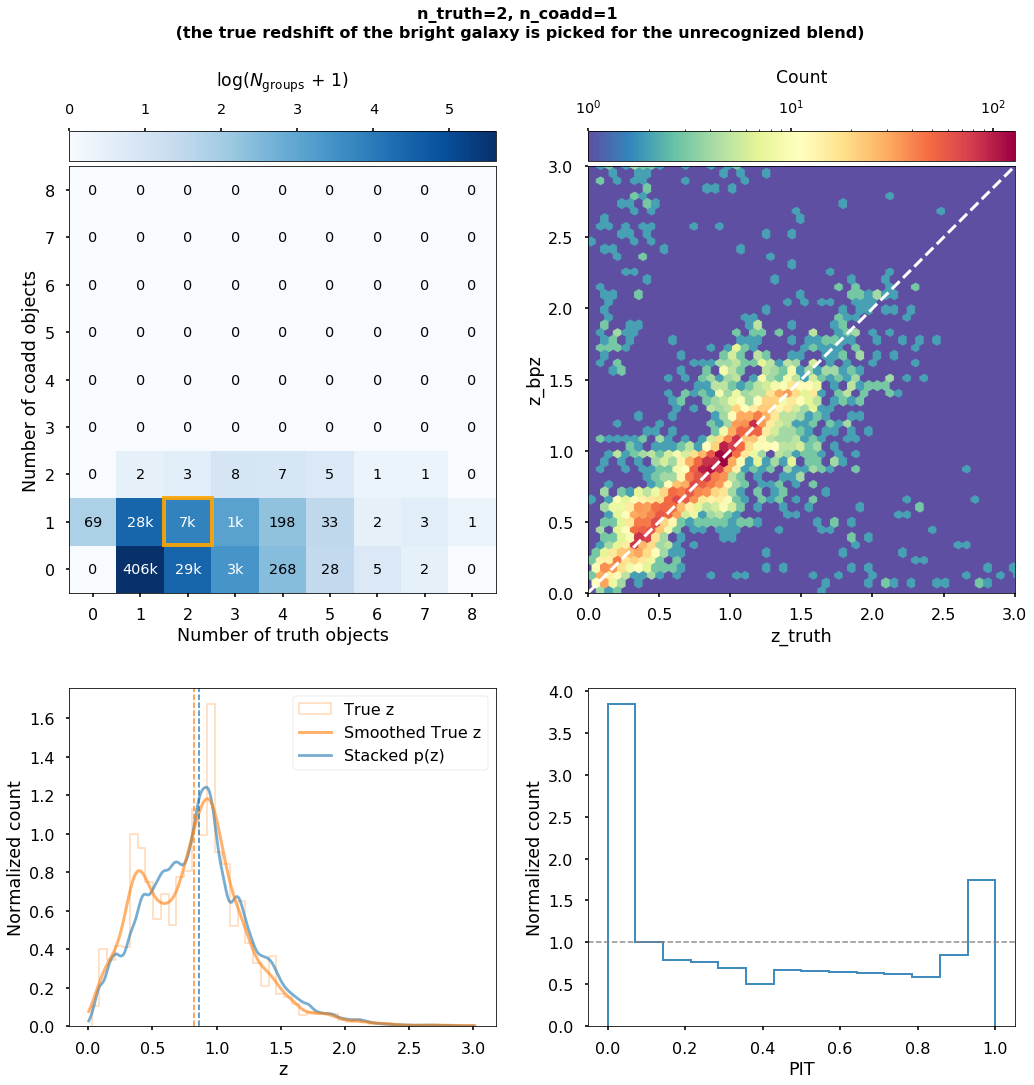

In [12]:
pzb.plot_multi(names=['fof','zz','pdf','pit'], verbose=1, save_plot=1)

INFO:root:plot_zz:load_redshifts: The redshift dataframes remained unchanged since no update was needed.
INFO:root:plot_pdf:load_redshifts: The redshift dataframes remained unchanged since no update was needed.
INFO:root:plot_pdf:stack_photoz: The stacked photoz remained unchanged since no update was needed.
INFO:root:plot_pdf:kde_dask: The kde-estimated true-z density funcion remained unchanged since no update was needed.
INFO:root:plot_pit:load_redshifts: The redshift dataframes remained unchanged since no update was needed.
INFO:root:plot_pit:calc_pits: The PIT values remained unchanged since no update was needed.


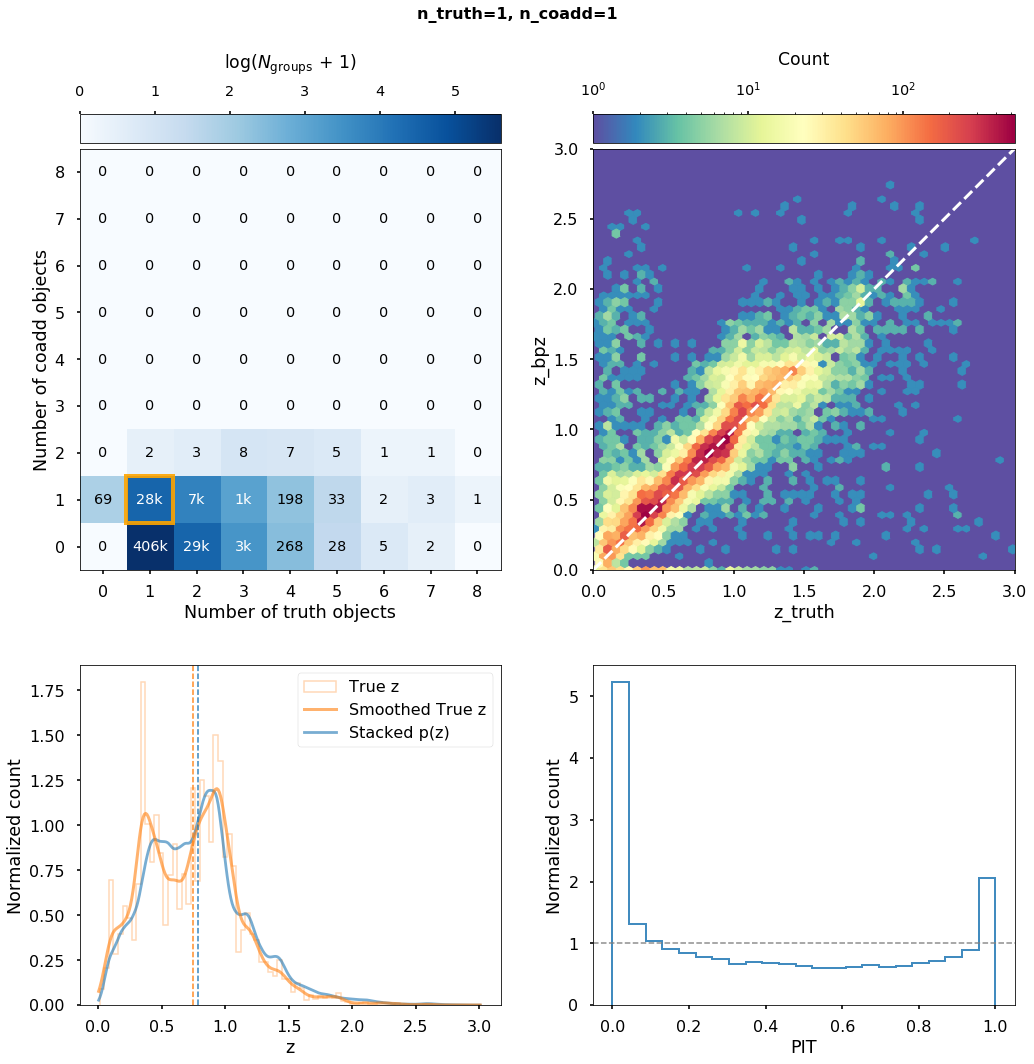

In [17]:
pzb.plot_multi(names=['fof','zz','pdf','pit'], verbose=1, pz_type='z_mean', num_truth=1, num_coadd=1) #, use_latest=True)

In [18]:
# - you can always view the current parameters and attributes of
#   the class at each step to make sure they are what you wanted
pzb.params

,value
truth_df,[[ 0.00000000e+00\n 2.07442150e+01\n 2.19088497e+01\...
coadd_df,[[0.0 1.0 16844531022438126\n 0.06599672477650459\n 0....
zgrid,[0.005 0.015 0.025 0.035\n 0.045 0.055 0.065 ... 2.945\n...
bandwidth,0.0494788
bandwidth_tuple,None
bandwidth_array,None
bandwidth_str,scott
search_params,None
true_z_hist_smooth,[0.07674089 0.100471\n 0.1282783 0.15974834\n 0.1940677...
refresh_z,False


In [16]:
# - save the class object (and load it later)
pzb.save()

INFO:root:<module>:save: The class object has been saved in '/Users/erfan/Downloads/python_codes/output/pzb.classobj.gzip'


In [19]:
pzb2= pzb.load()

INFO:root:<module>:load: The class object has been reloaded from '/Users/erfan/Downloads/python_codes/output/pzb.classobj.gzip'


INFO:root:plot_zz:load_redshifts: New redshift dataframes have been created.


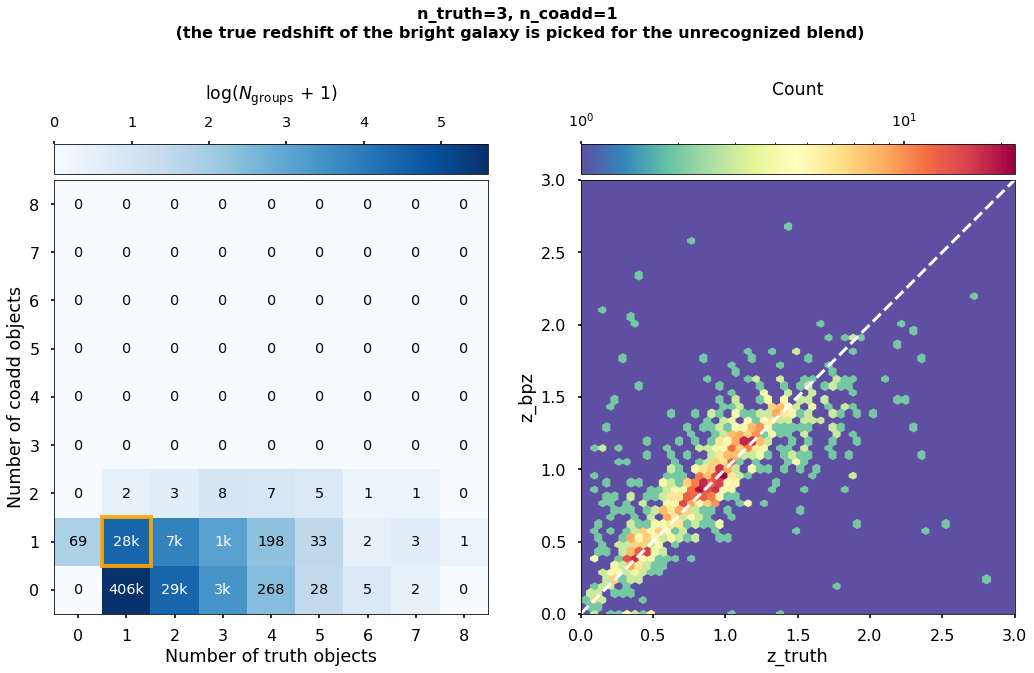

In [21]:
pzb2.plot_multi(names=['fof','zz'], verbose=1, pz_type='z_mean', num_truth=3, num_coadd=1, truth_pick='bright')